In [2]:
# this script takes 3 variable time points (first values tried were t-30, t-60, t-90) as x values 
# to predict y value "t".

# only glucose data is used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('glucose.csv')

# drop type and comments columns
df = df.drop(columns=['type', 'comments'])

# combine date and time columns, set datetime as index
df['datetime'] = df['date'].str.cat(df['time'], sep=' ')
df = df.set_index('datetime')
df = df.drop(columns=['date', 'time'])

In [4]:
# df['datetime'] = pd.to_datetime(df['datetime'], unit='s')

df.head()

,glucose
datetime,
2014-10-01 19:14:00,10.3
2014-10-01 19:19:00,9.9
2014-10-01 19:23:00,9.4
2014-10-01 19:24:00,9.8
2014-10-01 19:29:00,9.6


In [5]:
# convert glucose values from mmol/l to mg/dl
df['glucose'] = 18 * df['glucose']
df.head()

,glucose
datetime,
2014-10-01 19:14:00,185.4
2014-10-01 19:19:00,178.2
2014-10-01 19:23:00,169.2
2014-10-01 19:24:00,176.4
2014-10-01 19:29:00,172.8


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '2014-10-06 00:29:02'),
  Text(0.0, 0, '2014-10-01 19:14:00'),
  Text(200.0, 0, '2014-10-02 11:39:00'),
  Text(400.0, 0, '2014-10-03 03:59:00'),
  Text(600.0, 0, '2014-10-03 20:29:01'),
  Text(800.0, 0, '2014-10-04 12:44:01'),
  Text(1000.0, 0, '2014-10-05 05:09:02'),
  Text(1200.0, 0, '2014-10-05 21:24:02'),
  Text(1400.0, 0, '2014-10-06 13:49:02'),
  Text(1600.0, 0, '')])

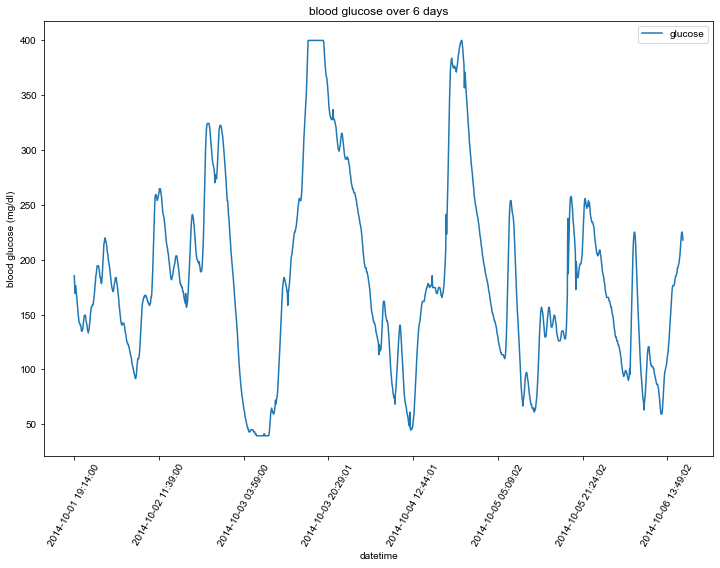

In [6]:
df.plot(figsize=(12,8))
plt.title('blood glucose over 6 days')
plt.ylabel('blood glucose (mg/dl)')
sns.set_style('whitegrid')
plt.xticks(rotation=60)

In [7]:
# create time windows
window_interval = 30 # time in minutes, smallest possible interval is 5 minutes

frame_1 = 'glucose_minus_' + str(window_interval)
frame_2 = 'glucose_minus_' + str(window_interval * 2)
frame_3 = 'glucose_minus_' + str(window_interval * 3)

frame_shift_1 = int(window_interval / 5)
frame_shift_2 = int((window_interval * 2) / 5)
frame_shift_3 = int((window_interval * 3) / 5)
print(frame_shift_1, frame_shift_2, frame_shift_3)

df[frame_1]=df['glucose'].shift(+frame_shift_1)
df[frame_2]=df['glucose'].shift(+frame_shift_2)
df[frame_3]=df['glucose'].shift(+frame_shift_3)

# drop na values
df=df.dropna()
df

6 12 18


,glucose,glucose_minus_30,glucose_minus_60,glucose_minus_90
datetime,,,,
2014-10-01 20:39:00,135.0,142.2,165.6,185.4
2014-10-01 20:44:00,135.0,142.2,160.2,178.2
2014-10-01 20:49:00,136.8,140.4,156.6,169.2
2014-10-01 20:54:00,140.4,140.4,151.2,176.4
2014-10-01 20:59:00,144.0,138.6,147.6,172.8
...,...,...,...,...
2014-10-06 16:34:02,221.4,196.2,185.4,176.4
2014-10-06 16:39:02,225.0,198.0,187.2,176.4
2014-10-06 16:44:02,225.0,201.6,189.0,178.2


In [8]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [9]:
import numpy as np
x1,x2,x3,y=df[frame_1],df[frame_2],df[frame_3],df['glucose']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)
final_x.shape

[[142.2 165.6 185.4]
 [142.2 160.2 178.2]
 [140.4 156.6 169.2]
 ...
 [201.6 189.  178.2]
 [205.2 192.6 181.8]
 [210.6 192.6 183.6]]


(1420, 3)

In [10]:
# split 70/30 into train and test sets 
X_train_size = int(len(final_x) * 0.7)
set_index = len(final_x) - X_train_size
print(set_index)
X_train,X_test,y_train,y_test=final_x[:-set_index],final_x[-set_index:],y[:-set_index],y[-set_index:]

427


In [11]:
model.fit(X_train,y_train) # random forest
lin_model.fit(X_train,y_train) # linear regression

/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_2534/3751041397.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train) # random forest


LinearRegression()

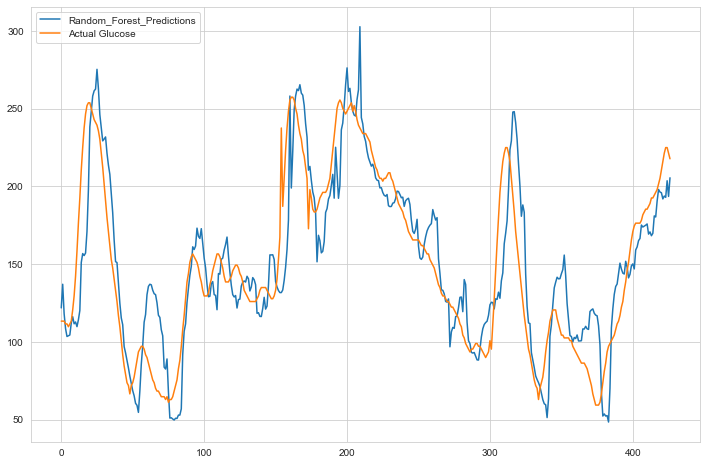

In [12]:
# Random Forest Regressor
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

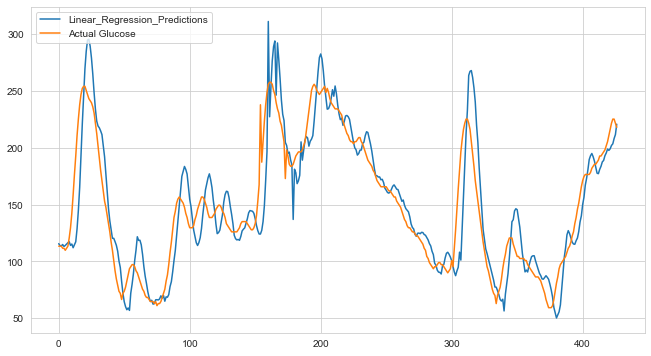

In [13]:
# Linear Regression
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Glucose')
plt.legend(loc="upper left")
plt.show()

In [37]:
# create weekly report for diabetes patient 0

total_time = len(y_test)
time_out_of_range = (y_test>200).sum()
percent_in_range = ((total_time - time_out_of_range) / total_time) * 100
pred_out_of_range = (lin_pred>200).sum()
pred_accuray = (pred_out_of_range / time_out_of_range) * 100
glucose_max = y_test.max()
glucose_min = y_test.min()
glucose_mean = y_test.mean()

# print(total_time)
# print(time_out_of_range)
print('This week, you spent ', percent_in_range, '% of your time in range')
print('Great job!\n')
print('Your average glucose level this week was : ', glucose_mean)
print('Your maximum value was: ', glucose_max)
print('Your minimum value was: ', glucose_min, '\n')

print('Nudge accurately predicted ', pred_out_of_range, '% of your time out of range')


This week, you spent  77.04918032786885 % of your time in range
Great job!

Your average glucose level this week was :  149.7245901639344
Your maximum value was:  257.40000000000003
Your minimum value was:  59.4 

Nudge accurately predicted  93 % of your time out of range


In [41]:
print(((y_test>200)&(lin_pred>200)).sum())

print((y_train>200).sum())
print((y_test>200).sum())


print((df['glucose']>200).sum())


75
401
98
499


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [15]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 28.739474263454447
Mean Squared Error for Linear Regression Model is: 25.742199497512836


In [16]:
# let's take a look at the actual data in the linear regression predicition df
lin_pred_df = pd.DataFrame(lin_pred)
lin_pred_df.tail()

,0
422,201.873009
423,203.286738
424,207.951095
425,211.410809
426,220.530437
